# Исследование объявлений о продаже квартир  

## Описание проекта  

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

## Описание данных  

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении  

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

<a id='back'><a/> 
# Задачи исследования
    
### [1. Изучение данных](#1)

- посмотрим на имеющиеся данные в таблице
- поиск аномалий
- предварительные выводы

### [2. Предобработка данных](#2)

- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить день недели, месяц и год объявления
- добавить этаж - первый, последний, другой
- добавить соотношение жилой и общей площади, а также отношение площади кухни к общей

### [3. Ответы на вопросы:](#3)

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.  

- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?  

- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.  

- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.  

- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.  

- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.  

- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?  

### [4. Результаты исследования](#4)
- Общие выводы

Приступим к изучению данных.

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

### Откроем файл с данными и изучим общую информацию. 

In [1]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import pprint

#прочитаем таблицу и сохраним ее в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

#для удобства отобразим все колонки таблицы 
pd.set_option('display.max_columns', None)

#ознакомимся с первыми 10 строками таблицы
data.head(10)    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#посмотрим общие сведения о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
#посмотрим рандомную выборку данных из иаблицы
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20303,5,2990000.0,32.3,2017-10-10T00:00:00,1,2.7,3.0,17.4,2,NaN,False,False,5.7,NaN,Пушкин,15766.0,27920.0,2.0,220.0,3.0,69.0,181.0
10845,19,8250000.0,55.0,2017-10-16T00:00:00,2,4.0,5.0,36.0,5,NaN,False,False,8.0,NaN,Санкт-Петербург,10287.0,10404.0,1.0,245.0,0.0,NaN,336.0
19250,8,3400000.0,30.0,2019-03-18T00:00:00,1,2.6,5.0,15.0,3,NaN,False,False,7.0,NaN,Санкт-Петербург,22735.0,15348.0,0.0,NaN,1.0,728.0,19.0
18390,18,5100000.0,76.0,2015-05-06T00:00:00,3,NaN,5.0,46.0,4,NaN,False,False,8.0,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,915.0
8376,11,4590000.0,54.0,2017-08-03T00:00:00,2,2.7,16.0,27.0,3,NaN,False,False,10.0,2.0,Санкт-Петербург,14514.0,16558.0,1.0,524.0,0.0,NaN,67.0
13353,20,13700000.0,82.3,2019-02-12T00:00:00,3,2.6,13.0,50.5,2,False,False,False,11.6,3.0,Санкт-Петербург,15495.0,9732.0,1.0,423.0,3.0,528.0,8.0
15655,13,5200000.0,63.0,2015-02-13T00:00:00,2,NaN,17.0,33.0,2,NaN,False,False,14.0,NaN,Санкт-Петербург,17209.0,16005.0,1.0,557.0,2.0,830.0,1072.0
7273,16,5600000.0,57.0,2018-10-26T00:00:00,2,NaN,18.0,35.0,2,NaN,False,False,10.0,1.0,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,3.0
9242,14,4490000.0,59.0,2017-08-02T00:00:00,2,2.7,9.0,36.0,9,False,False,False,10.0,1.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,339.0
7452,12,4880000.0,60.4,2019-01-29T00:00:00,3,2.5,9.0,43.6,9,NaN,False,False,6.3,NaN,Санкт-Петербург,45956.0,18680.0,0.0,NaN,0.0,NaN,58.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

• При первом визуальном ознакомлении с данными мы видим, что есть много пропущенных значений в болшинстве столбцов. Присутствуют не совсем корректные названия столбцов и некорректные типы данных в столбцах, например в 'first_day_exposition' и 'is_apartment'.

• Высота потолков не может быть двузначной величиной, а также меньше 2,5 м (в данных существуют значения в 1,75 м и даже в 1 м). Пропущенные значения мы можем заменить на медианные для зданий соотвестующей этажности.

• По числу этажей в здании заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями возможно придется удалить.

• Жилая площадь и площадь кухни нам так же неизвестны в некоторых случаях, однако в квартирах-студиях мы можем отсутствующую площадь кухни заменить на нули, так как в таких квартирах кухня совмещена как правило с жилой комнатой.

• Наличие балкона играет большую роль в формировании стоимости квартиры, поэтому предположим, что при продаже наличие балкона скорее всего не забыли бы упомянуть. Поэтому заменим отсутствующие значения на нули.

• Название населенного пункта очень важный фактор для исследования и мы не можем заполнить пропущенные значения на основе других признаков, соответственно, пропущенные значения возможно придется удалить.

• Расстояние до центра города и таких объектов как водоемы, аэропорты так же оставим не заполненными, так как не можем определить их по другим признакам и некоторые данные не будем использовать в этом анализе

<a id='2'><a/> 
## 2. Предобработка данных
[Назад к оглавлению](#back)

In [5]:
#выведем названия столбцов
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [6]:
#переименуем столбы
cols_names = ['total_images',
              'last_price',
              'total_area_m2',
              'first_day_exposition',
              'number_of_rooms',
              'ceiling_height_m',
              'total_floors_in_house',
              'living_area_m2',
              'floor',
              'is_apartment',
              'is_studio',
              'is_open_plan',
              'kitchen_area_m2',
              'number_of_balconies',
              'city_name',
              'nearest_airport_distance_m',
              'city_center_distance_m',
              'parks_numbers_within_3km',
              'nearest_park_distance_m',
              'ponds_number_within_3km',
              'nearest_pond_distance_m',
              'days_exposition']
data.set_axis(cols_names, axis='columns', inplace=True)

In [7]:
#для удобства работы с таблицой, поменяем положение столбцов начиная с самой значимой информации и заказчивая второстепенной
data = data[[
 'city_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_open_plan',
 'is_apartment',
 'is_studio',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

data.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,NaN,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,False,NaN,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,False,NaN,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,False,NaN,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,NaN,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [8]:
#посмотрим сколько отсуствующих значений в столбцах
data.isnull().sum().sort_values()

is_open_plan                      0
total_area_m2                     0
first_day_exposition              0
last_price                        0
total_images                      0
number_of_rooms                   0
is_studio                         0
floor                             0
city_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

Присутствует много пропущенных значений с расстоянием до парков, водоемов, центра города и аэропортов. Наиболее вероятная причина - эти значения проставляются системой автоматически, и из-за ее неточности возникают такие пропуски. В таком случае можно сделать апгрейд системы, чтобы она просчитывала и проставляла такие значения по картам(как навигатор). Так же из возможных причин, если система не автоматизированна, то люди скорее всего могут не знать точного расстояния до центра города, парков, водоемов и аэропортов. Или же им просто лень заполнять подобную информацию.

Отсутствие указания данных в столбцах с названием города и метражом жилой площади/кухни, этажности дома пропуски более странной природы, так как это важная и точная информация. 

Столбец 'is_apartment' является данными о том, какой статус у помещения, жилое или коммерческое. Пока можно сделать предположение, что отсутствующие значения это статус "не апартаменты", что означает, что квартира это жилое помещение.

In [9]:
#проверим написание названий городов
data['city_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Некоторые названия дублируются с разницей написания "е" и "ё", попробуем заменить везде написание на "е".

In [10]:
#посмотрим, сколько уникальных значений
len(data['city_name'].unique())

365

In [11]:
#заменяем "ё" на "е"
data['city_name'] = data['city_name'].str.replace('ё', 'е', regex=True)

In [12]:
#посмотрим, сколько уникальных значений
len(data['city_name'].unique())

331

В данных присутствовало 34 дублирующих значения, отличающихся написанием одной буквы, которые мы убрали.

In [13]:
#проверим сколько отсуствующих значений в столбце с названием города
data['city_name'].isna().sum()

49

В масштабах данной выборки 49 строк это достаточно мало, а без информации о городе мы не можем делать никаких выводов, так как не возможно по другим признакам определить город и заменить пропущенные значения. Поэтому мы удалим данные строки.

In [14]:
#удаляем строки с пропущенными значениями
data = data.dropna(subset=['city_name'])

In [15]:
#проверим удалились ли строки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
city_name                     23650 non-null object
total_area_m2                 23650 non-null float64
living_area_m2                21752 non-null float64
kitchen_area_m2               21381 non-null float64
ceiling_height_m              14490 non-null float64
number_of_rooms               23650 non-null int64
number_of_balconies           12137 non-null float64
floor                         23650 non-null int64
total_floors_in_house         23565 non-null float64
is_open_plan                  23650 non-null bool
is_apartment                  2760 non-null object
is_studio                     23650 non-null bool
total_images                  23650 non-null int64
last_price                    23650 non-null float64
first_day_exposition          23650 non-null object
days_exposition               20470 non-null float64
city_center_distance_m        18139 non-null float64
neares

In [16]:
#посмотрим данные по высоте птолков
ceiling_medians = data.pivot_table(index='total_floors_in_house', values='ceiling_height_m', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
total_floors_in_house,,
1.0,2.80,10
2.0,2.70,213
3.0,2.80,399
4.0,3.00,787
5.0,2.55,3662


In [17]:
#заменим значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['total_floors_in_house'].isna()) | 
             ((data['total_floors_in_house'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height_m'] = data['ceiling_height_m'].describe()[4]

#медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height_m'].isna()) & 
             (data['total_floors_in_house'] == floor), 
             'ceiling_height_m'] = ceiling_medians.loc[floor, 'median']

In [18]:
#теперь посмотрим на все значения высоты потолков
data[['ceiling_height_m']].describe()

,ceiling_height_m
count,23650.000000
mean,2.734956
std,0.995290
min,1.000000
25%,2.550000
50%,2.650000
75%,2.750000
max,100.000000


Потолки высотой 1 метр бывают только в домиках для хоббитов :) А высота в 100 метров в стране великанов. Заменим все выбивающиеся за норму значения на медианные.

In [19]:
#заменяем на медиану
data.loc[(data['ceiling_height_m'] > 5) | (data['ceiling_height_m'] < 2.20), 'ceiling_height_m'] = data['ceiling_height_m'].median()

In [20]:
#посмотрим сколько пропущенных значений с этажностью здания
data['total_floors_in_house'].isna().sum()

85

In [21]:
#посмотрим на эти строки
data[data['total_floors_in_house'].isna()]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
186,Санкт-Петербург,65.2,30.80,12.00,2.52,2,NaN,4,NaN,False,NaN,False,12,11640000.0,2018-10-02T00:00:00,49.0,12373.0,39197.0,1.0,123.0,0.0,NaN
237,Санкт-Петербург,28.1,20.75,NaN,2.52,1,0.0,1,NaN,False,NaN,False,4,2438033.0,2016-11-23T00:00:00,251.0,17369.0,22041.0,0.0,NaN,1.0,374.0
457,Санкт-Петербург,70.8,38.40,10.63,2.52,2,0.0,12,NaN,False,NaN,False,4,9788348.0,2015-08-01T00:00:00,727.0,8322.0,37364.0,2.0,309.0,2.0,706.0
671,Санкт-Петербург,93.6,47.10,16.80,2.52,3,0.0,8,NaN,False,NaN,False,4,6051191.0,2017-04-06T00:00:00,123.0,17369.0,22041.0,0.0,NaN,1.0,374.0
1757,Санкт-Петербург,39.0,NaN,NaN,2.52,1,0.0,9,NaN,False,NaN,False,5,3600000.0,2017-04-22T00:00:00,77.0,11618.0,22735.0,1.0,835.0,1.0,652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,Санкт-Петербург,63.5,NaN,NaN,2.52,2,NaN,3,NaN,False,NaN,False,5,8500000.0,2017-05-24T00:00:00,512.0,15363.0,51340.0,0.0,NaN,1.0,853.0
22656,Санкт-Петербург,64.5,31.70,14.40,2.52,2,0.0,20,NaN,False,NaN,False,4,4574160.0,2017-04-02T00:00:00,127.0,17369.0,22041.0,0.0,NaN,1.0,374.0
22808,Санкт-Петербург,110.4,45.38,23.42,2.52,3,0.0,6,NaN,False,NaN,False,0,14569263.0,2016-11-20T00:00:00,260.0,4529.0,19095.0,0.0,NaN,0.0,NaN
23590,Санкт-Петербург,123.3,50.40,23.60,2.52,3,0.0,18,NaN,False,NaN,False,0,21187872.0,2017-04-25T00:00:00,104.0,4529.0,19095.0,0.0,NaN,0.0,NaN


В масштабах данной выборки это незначительное число строк, мы можем их удалить, однако, в них содержатся другие ценные для нас данные и чтобы их сохранить, мы заменим пропуски на значения этажа квартиры. 

In [22]:
#заменим значения
data['total_floors_in_house'].replace(np.nan, data['floor'], inplace=True)

In [23]:
#проверим, остались ли пропщенные значения в столбце
data['total_floors_in_house'].isna().sum()

0

In [24]:
#посмотрим уникальные значения числа комнат
data['number_of_rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [25]:
#посмотрим, сколько строк с нулевым значением комнат
data[data['number_of_rooms'] == 0]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
144,поселок Мурино,27.00,15.50,NaN,2.75,0,2.0,2,24.0,False,NaN,True,1,2450000.0,2017-03-30T00:00:00,181.0,NaN,NaN,NaN,NaN,NaN,NaN
349,деревня Кудрово,25.00,17.00,NaN,2.60,0,0.0,1,14.0,True,NaN,False,4,2320000.0,2017-09-27T00:00:00,45.0,NaN,NaN,NaN,NaN,NaN,NaN
440,Санкт-Петербург,27.11,24.75,NaN,2.70,0,2.0,4,17.0,False,NaN,True,8,2480000.0,2018-03-12T00:00:00,64.0,15015.0,38171.0,0.0,NaN,2.0,982.0
508,поселок Парголово,34.40,24.30,NaN,2.66,0,1.0,19,26.0,True,NaN,False,0,3375000.0,2017-03-28T00:00:00,430.0,19292.0,53115.0,0.0,NaN,1.0,593.0
608,поселок Шушары,25.00,NaN,NaN,2.60,0,NaN,7,10.0,False,NaN,True,2,1850000.0,2019-02-20T00:00:00,29.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,26.00,18.00,NaN,2.75,0,0.0,16,25.0,False,NaN,True,7,3200000.0,2017-09-01T00:00:00,14.0,13222.0,11405.0,0.0,NaN,1.0,623.0
23442,поселок Мурино,27.70,18.00,NaN,2.75,0,2.0,4,24.0,True,NaN,False,0,2500000.0,2017-09-28T00:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN
23554,Санкт-Петербург,26.00,NaN,NaN,2.75,0,NaN,8,19.0,False,NaN,True,15,3350000.0,2018-09-07T00:00:00,31.0,17092.0,18090.0,0.0,NaN,2.0,112.0
23592,Никольское,29.00,18.00,NaN,2.55,0,2.0,8,9.0,True,NaN,False,10,1450000.0,2017-11-11T00:00:00,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#подсчитаем медианы числа комнат по общей площади
room_medians = data.pivot_table(index='total_area_m2', values='number_of_rooms', aggfunc=['median', 'count'])
room_medians.columns = ['median', 'count']

In [27]:
#заменим нулевые значения медианными
for room in room_medians.index:
    data.loc[(data['number_of_rooms'] == 0), 
             'number_of_rooms'] = room_medians.loc[room, 'median']

In [28]:
#проверим уникальные значения количества комнат
data['number_of_rooms'].unique()

array([ 3.,  1.,  2.,  4.,  5.,  6.,  7., 11.,  8., 14., 10., 15.,  9.,
       19., 16., 12.])

In [29]:
#посмотрим на данные по жилой площади
data[['living_area_m2']].describe()

,living_area_m2
count,21752.000000
mean,34.448356
std,22.037664
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


Минимальное значение жилой площади составляет 2 кв.м, что слишком мало. Предположим, что минимальная жилая площадь квартиры-студии 8 кв.м, взглянем, сколько строк со значением меньше. 

In [30]:
data[data['living_area_m2'] < 8]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
3242,Санкт-Петербург,41.0,3.0,11.0,2.70,1.0,NaN,17,17.0,False,NaN,False,7,4440000.0,2017-07-02T00:00:00,216.0,13073.0,19272.0,0.0,NaN,0.0,NaN
13915,Санкт-Петербург,52.0,2.0,9.0,3.00,2.0,NaN,2,6.0,False,NaN,False,20,6350000.0,2018-02-06T00:00:00,91.0,6521.0,32453.0,0.0,NaN,1.0,1012.0
16431,Санкт-Петербург,31.0,6.0,17.0,2.60,1.0,NaN,1,5.0,False,NaN,False,13,3799000.0,2018-04-12T00:00:00,168.0,4826.0,32177.0,1.0,430.0,0.0,NaN
17582,Санкт-Петербург,22.0,5.0,NaN,2.75,1.0,2.0,8,25.0,False,NaN,True,11,2680000.0,2018-08-11T00:00:00,70.0,11618.0,22735.0,1.0,835.0,1.0,652.0
19251,Санкт-Петербург,33.0,6.5,18.0,2.50,1.0,NaN,21,22.0,False,NaN,False,19,4050000.0,2018-10-15T00:00:00,44.0,10592.0,9258.0,1.0,458.0,0.0,NaN
21758,поселок Мурино,23.0,2.0,NaN,2.75,1.0,NaN,22,24.0,False,NaN,True,0,2330000.0,2018-01-01T00:00:00,66.0,NaN,NaN,NaN,NaN,NaN,NaN
21943,Санкт-Петербург,77.6,5.4,9.8,2.50,4.0,NaN,1,9.0,False,NaN,False,15,6100000.0,2019-02-28T00:00:00,33.0,11270.0,29338.0,1.0,584.0,0.0,NaN
23574,Санкт-Петербург,139.0,3.0,16.0,3.00,3.0,1.0,8,8.0,False,NaN,False,14,64990000.0,2015-11-24T00:00:00,280.0,5975.0,33255.0,1.0,630.0,3.0,100.0


Всего 8 строк и очевидно, что данные с ошибками и не соотвествуют реальности. Попробуем заменить значения на медианные по числу комнат.

In [31]:
#подсчитаем медианые значения чжилой площади по числу комнат
living_area_medians = data.pivot_table(index='number_of_rooms', values='living_area_m2', aggfunc=['median', 'count'])
living_area_medians.columns = ['median', 'count']

In [32]:
#заменим "странно низкие" значения медианными
for living_area in living_area_medians.index:
    data.loc[(data['living_area_m2'] < 8), 
             'living_area_m2'] = living_area_medians.loc[living_area, 'median']

In [33]:
#посмотрим на данные по общей площади
data[['total_area_m2']].describe()

,total_area_m2
count,23650.000000
mean,60.329069
std,35.661808
min,12.000000
25%,40.000000
50%,52.000000
75%,69.700000
max,900.000000


Максимальное значение общей площади составляет 900 кв.м, что достаточно много. В центре Санкт-Петербурга есть коммунальные квартиры, которые в последнее время массово расселяют и выкупают полностью. Общая площадь таких квартир может доходить до 200-400 квадратных метров. Поэтому предположим, что "нормальные" значения - до 500 кв.м. Посмотрим на данные, в которых площадь больше. 

In [34]:
data[data['total_area_m2'] > 500]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
3117,Санкт-Петербург,631.0,NaN,60.0,2.55,7.0,NaN,5,5.0,False,NaN,False,19,140000000.0,2019-03-30T00:00:00,NaN,4972.0,25707.0,0.0,NaN,2.0,210.0
4237,Санкт-Петербург,517.0,332.0,22.0,3.00,7.0,NaN,3,4.0,False,NaN,False,1,50000000.0,2017-10-14T00:00:00,NaN,1847.0,22835.0,2.0,477.0,2.0,540.0
5358,Санкт-Петербург,590.0,409.0,100.0,3.50,15.0,NaN,3,6.0,False,NaN,False,20,65000000.0,2019-02-14T00:00:00,14.0,4666.0,24447.0,1.0,767.0,0.0,NaN
8018,Санкт-Петербург,507.0,301.5,45.5,4.45,5.0,1.0,7,7.0,False,True,False,20,84000000.0,2015-12-17T00:00:00,1078.0,5735.0,NaN,2.0,110.0,0.0,NaN
12859,Санкт-Петербург,631.2,322.3,19.5,3.90,7.0,1.0,4,4.0,False,NaN,False,20,140000000.0,2019-04-09T00:00:00,NaN,4972.0,25707.0,0.0,NaN,2.0,210.0
15651,Санкт-Петербург,618.0,258.0,70.0,3.40,7.0,NaN,5,7.0,False,NaN,False,20,300000000.0,2017-12-18T00:00:00,111.0,5297.0,32440.0,0.0,NaN,2.0,198.0
19540,Санкт-Петербург,900.0,409.7,112.0,2.80,12.0,NaN,25,25.0,False,NaN,False,8,420000000.0,2017-12-06T00:00:00,106.0,7877.0,30706.0,0.0,NaN,2.0,318.0


Судя по значениям жилой площади, площади кухни и количеству комнат эти данные похожи на настоящие. Вполне вероятно, что это те самые расселенные коммуналки или мини-отели, которые предварительно выкупили несколько квартир на этаже. Эти данные мы оставим как есть и рассмотрим далее отдельно.  

In [35]:
data.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3.0,NaN,8,16.0,False,NaN,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,поселок Шушары,40.4,18.6,11.0,2.75,1.0,2.0,1,11.0,False,NaN,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,2.55,2.0,0.0,4,5.0,False,NaN,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,2.60,3.0,0.0,9,14.0,False,NaN,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2.0,NaN,13,14.0,False,NaN,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [36]:
#заменим пропущенные значения площади кухнина в квартирах-студиях на нули
data.loc[data['is_studio'] == True, 'kitchen_area_m2'] = 0

In [37]:
#посмотрим информацию по балконам
data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [38]:
#заменим Nan в столбце 'number_of_balconies' на нули
data['number_of_balconies'].fillna(0, inplace=True)

In [39]:
#посмотрим статистику по балконам
data['number_of_balconies'].value_counts().sort_values(ascending=False)

0.0    15238
1.0     4187
2.0     3658
5.0      304
4.0      182
3.0       81
Name: number_of_balconies, dtype: int64

In [40]:
#проверим сколько отсуствующих значений в столбце длительности размещения публикации
data['days_exposition'].isna().sum()

3180

In [41]:
#переведем день публикации объявления в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

Для удобства восприятия удаленности квартиры от различных объектов переведем расстояние в км

In [42]:
#переведем метры в километры

def m_to_km(column):
    return column / 1000

data['city_center_distance_m'] = data['city_center_distance_m'].apply(lambda x : m_to_km(x))
data['nearest_airport_distance_m'] = data['nearest_airport_distance_m'].apply(lambda x : m_to_km(x))
data['nearest_park_distance_m'] = data['nearest_park_distance_m'].apply(lambda x : m_to_km(x))
data['nearest_pond_distance_m'] = data['nearest_pond_distance_m'].apply(lambda x : m_to_km(x))

In [43]:
#переименуем колонки

#old_names = ['city_center_distance_m', 'nearest_airport_distance_m', 'nearest_park_distance_m', 'nearest_pond_distance_m'] 
#new_names = ['city_center_distance_km', 'nearest_airport_distance_km', 'nearest_park_distance_km', 'nearest_pond_distance_km'] 
#data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

data.rename(columns = {
      'city_center_distance_m' : 'city_center_distance_km',
      'nearest_airport_distance_m' : 'nearest_airport_distance_km',
      'nearest_park_distance_m' : 'nearest_park_distance_km',
      'nearest_pond_distance_m' : 'nearest_pond_distance_km'},inplace = True)

У столбца 'is_apartment' тип object, что помешает нам при дальнейшей обработке данных, проверим его и переведем в булевой тип как схожие столбцы 'is_open_plan' и 'is_studio'.

In [44]:
#проверим уникальные значения в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [45]:
#заменим пропущенные значения на False
data['is_apartment'].replace(np.nan, 'False', inplace=True)

In [46]:
#переведем 'is_apartment' в булевый тип
data.is_apartment = data.is_apartment.astype(np.bool)

In [47]:
data['is_apartment'].value_counts()

True     20940
False     2710
Name: is_apartment, dtype: int64

In [48]:
#переведем 'number_of_balconies', 'total_floors_in_house' и 'last_price' в целочисленный тип
data.number_of_balconies = data.number_of_balconies.astype(np.int64)
data.last_price = data.last_price.astype(np.int64)
data.total_floors_in_house = data.total_floors_in_house.astype(np.int64)

In [49]:
data.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3.0,0,8,16,False,True,False,20,13000000,2019-03-07,NaN,16.028,18.863,1.0,0.482,2.0,0.755
1,поселок Шушары,40.4,18.6,11.0,2.75,1.0,2,1,11,False,True,False,7,3350000,2018-12-04,81.0,18.603,12.817,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,2.55,2.0,0,4,5,False,True,False,10,5196000,2015-08-20,558.0,13.933,21.741,1.0,0.090,2.0,0.574
3,Санкт-Петербург,159.0,NaN,NaN,2.60,3.0,0,9,14,False,True,False,0,64900000,2015-07-24,424.0,6.800,28.098,2.0,0.084,3.0,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2.0,0,13,14,False,True,False,2,10000000,2018-06-19,121.0,8.098,31.856,2.0,0.112,1.0,0.048


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
city_name                      23650 non-null object
total_area_m2                  23650 non-null float64
living_area_m2                 21752 non-null float64
kitchen_area_m2                21530 non-null float64
ceiling_height_m               23650 non-null float64
number_of_rooms                23650 non-null float64
number_of_balconies            23650 non-null int64
floor                          23650 non-null int64
total_floors_in_house          23650 non-null int64
is_open_plan                   23650 non-null bool
is_apartment                   23650 non-null bool
is_studio                      23650 non-null bool
total_images                   23650 non-null int64
last_price                     23650 non-null int64
first_day_exposition           23650 non-null datetime64[ns]
days_exposition                20470 non-null float64
city_center_distance_km        18139 non

### Вывод

• Для удобства работы с таблицей, мы заменили названия столбцов на более понятные(с уточнениями), поменяли столбцы в таблице местами для удобства восприятия информации.   

• Убрали дубликаты в названии населенных пунктов, отличающихся только написанием "е" и "ё".   

• Столбец с названием населенного пункта - ключевой для исследования. Заполнить пропуски по другим признакам невозможно, при этом их достаточно мало в масштабах выборки, поэтому мы удалили строки с отсутствующими значениями.   

• Пропущенные значения высоты потолков заменили медианным значением для этажности зданий. Выбивающиеся слишком высокие и слишком низкие значения заменили просто медианой.  

• Пропуски с этажностью здания заменить на медианные значения в данной ситуации невозможно, так как присутствуют значения этажа квартиры больше медианного значения этажности здания, поэтому мы заменили пропущенные значения на значения этажа квартиры. В масштабах данной выборки это не исказит данные, при этом позволит сохранить другие ценные данные в строках.   

• Заменить пропущенные значения в столбце с метражом кухни мы не можем, но можем и заменили пропущенные значения площади кухни в квартирах-студиях на нули, так как в студиях открытая планировка и кухня как правило кухня интегрирована в жилое пространство.  
• Заменили аномально-маленькие значения жилой площади. 

• Наличие балкона важный фактор при оценке стоимости квартиры, поэтому вряд ли его наличие забыли бы указать. Мы предположили, что пропущенные значения означают отсутствие балкона в квартире и заменили значения на False.  

• Аналогичное предположение мы сделали и по поводу столбца 'is_apartment', что пропущенные значения означают False.  

• Заменить пропущенные значения в столбцах с расстоянием до парков, прудов, центра города и ближайших аэропортов невозможно по другим признакам. Можно автоматизировать систему, чтобы она производила такие расчеты автоматически исходя из адреса объекта.   

• Так же перевели значения столбца 'first_day_exposition' в формат datetime и расстояние до центра и парков из метров в км.  

### Посчитайте и добавьте в таблицу

In [51]:
#добавим столбцы c днем, месяцем и годом для удобства
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

Важным фактором при формировании цены на квартиру является этаж. Квартиры на верхних этажах - более престижные, первые этажи котируются меньше всего. Добавим новый столбец с категоризацией по этажу, на котором находится квартира.

In [52]:
#напишем функцию для категоризации
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [53]:
#добавим столбец
data['floor_category'] = data.apply(floor_category, axis=1)

In [54]:
#добавим цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area_m2']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [55]:
#добавим соотношение общей и жилой площади, площади кухни
data['total_living_area_ratio'] = data['living_area_m2'] / data['total_area_m2']
data['total_kitchen_area_ratio'] = data['kitchen_area_m2'] / data['total_area_m2']

In [56]:
#посмотрим количество нулевых значений в столбцах
data[['total_living_area_ratio', 'total_kitchen_area_ratio']].isnull().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio    2120
dtype: int64

In [57]:
#посмотрим рандомную выборку данных из иаблицы
data.sample(10)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_category,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
5816,Санкт-Петербург,63.3,37.80,10.40,2.50,2.0,0,1,16,False,True,False,17,5200000,2017-06-22,168.0,14.739,23.435,0.0,NaN,0.0,NaN,Thursday,June,2017,первый,82148.50,0.597156,0.164297
20161,Пушкин,41.3,14.80,13.10,2.80,1.0,0,5,5,False,True,False,7,3850000,2017-04-27,8.0,30.232,18.079,1.0,0.357,1.0,0.177,Thursday,April,2017,последний,93220.34,0.358354,0.317191
16034,Санкт-Петербург,60.2,10.50,30.00,3.60,2.0,0,3,5,False,True,False,15,12900000,2015-07-30,529.0,4.213,23.431,0.0,NaN,0.0,NaN,Thursday,July,2015,другой,214285.71,0.174419,0.498339
16114,Санкт-Петербург,57.0,28.30,9.16,2.75,2.0,2,13,25,False,False,False,16,6490000,2018-06-29,41.0,9.760,42.742,0.0,NaN,0.0,NaN,Friday,June,2018,другой,113859.65,0.496491,0.160702
9844,деревня Кипень,48.0,27.00,7.00,2.55,2.0,0,5,5,False,True,False,3,2400000,2015-05-20,600.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,May,2015,последний,50000.00,0.562500,0.145833
3029,деревня Кудрово,38.5,16.70,13.60,2.60,1.0,1,3,14,False,True,False,12,3400000,2018-02-05,139.0,NaN,NaN,NaN,NaN,NaN,NaN,Monday,February,2018,другой,88311.69,0.433766,0.353247
1857,Отрадное,55.5,30.12,8.21,2.50,2.0,1,1,9,False,False,False,10,2800000,2018-08-29,22.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,August,2018,первый,50450.45,0.542703,0.147928
13998,Санкт-Петербург,56.0,38.00,7.00,2.50,2.0,0,7,9,False,True,False,20,5654000,2018-05-31,190.0,8.838,31.760,2.0,0.342,1.0,0.140,Thursday,May,2018,другой,100964.29,0.678571,0.125000
21383,Санкт-Петербург,60.3,44.00,7.40,2.50,4.0,0,2,5,False,True,False,12,5399000,2018-06-02,125.0,17.498,17.590,1.0,0.667,0.0,NaN,Saturday,June,2018,другой,89535.66,0.729685,0.122720
16262,Санкт-Петербург,31.6,15.00,10.00,2.60,1.0,2,9,14,False,True,False,16,3450000,2018-01-01,77.0,16.414,35.250,0.0,NaN,1.0,0.400,Monday,January,2018,другой,109177.22,0.474684,0.316456


### Вывод

Этаж на котором находится квартира - важный фактор при оценке лота, поэтому мы добавили категоризацию по данному признаку, которая поможет в дальнейшем исследовании данных. Цена за квадратный метр это основной признак, по которому ориентируется большинство покупателей при поиске жилья, поэтому так же его добавили.

<a id='3'><a/> 
## 3. Ответы на вопросы
[Назад к оглавлению](#back)

### Исследовательский анализ данных

In [58]:
#отобразим все вещественные числа округлив их до сотых
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,year_exposition,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
count,"23,650.00","21,752.00","21,530.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","20,470.00","18,139.00","18,116.00","18,140.00","8,064.00","18,140.00","9,085.00","23,650.00","23,650.00","21,752.00","21,530.00"
mean,60.33,34.45,10.49,2.71,2.08,0.59,5.89,10.67,9.86,"6,541,126.90",180.75,14.20,28.80,0.61,0.49,0.77,0.52,"2,017.37","99,432.25",0.56,0.19
std,35.66,22.03,5.95,0.23,1.07,0.96,4.88,6.59,5.68,"10,896,399.18",219.78,8.61,12.64,0.80,0.34,0.94,0.28,1.04,"50,337.94",0.11,0.07
min,12.00,8.00,0.00,2.20,1.00,0.00,1.00,1.00,0.00,"12,190.00",1.00,0.18,0.00,0.00,0.00,0.00,0.01,"2,014.00",111.83,0.13,0.00
25%,40.00,18.60,7.00,2.55,1.00,0.00,2.00,5.00,6.00,"3,400,000.00",45.00,9.24,18.58,0.00,0.29,0.00,0.29,"2,017.00","76,614.96",0.50,0.13
50%,52.00,30.00,9.00,2.65,2.00,0.00,4.00,9.00,9.00,"4,650,000.00",95.00,13.11,26.76,0.00,0.45,1.00,0.50,"2,017.00","95,000.00",0.57,0.17
75%,69.70,42.30,12.00,2.75,3.00,1.00,8.00,16.00,14.00,"6,799,000.00",231.00,16.29,37.29,1.00,0.61,1.00,0.73,"2,018.00","114,274.16",0.64,0.23
max,900.00,409.70,112.00,5.00,19.00,5.00,33.00,60.00,50.00,"763,000,000.00","1,580.00",65.97,84.87,3.00,3.19,3.00,1.34,"2,019.00","1,907,500.00",1.00,0.79


In [59]:
#изучим следующие параметры: площадь, цена, число комнат, высота потолков
data[['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m']].describe()

,total_area_m2,last_price,number_of_rooms,ceiling_height_m
count,"23,650.00","23,650.00","23,650.00","23,650.00"
mean,60.33,"6,541,126.90",2.08,2.71
std,35.66,"10,896,399.18",1.07,0.23
min,12.00,"12,190.00",1.00,2.20
25%,40.00,"3,400,000.00",1.00,2.55
50%,52.00,"4,650,000.00",2.00,2.65
75%,69.70,"6,799,000.00",3.00,2.75
max,900.00,"763,000,000.00",19.00,5.00


Изучим сегмент "среднестатистических" квартир, которые не являются крошечными студиями или огромными квартирами с большим количеством комнат.

In [60]:
#напишем функцию для удаления аномальных значений при построении диаграммы размаха

def del_outliers(data, column,graphic=0,x=10,y=10):
    quantile_1 = data[column].quantile(0.25)                 
    quantile_3 = data[column].quantile(0.75)
    result = quantile_3 - quantile_1
    interval = (data[column] >= (quantile_1 - 1.5*result)) & (data[column] <= (quantile_3 + 1.5*result))
    if graphic == 1:
        return data.loc[interval].boxplot([column], figsize=(x,y))
    else:
        return data.loc[interval]

In [61]:
#напишем функцию, получающую на вход название признака, и возвращающая границы "усов"
def whiskers(column):
    stat = data[column].describe()
    
    #межквартирльный размах
    iqr = stat[6] - stat[4]
    
    #левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    #левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    #правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [62]:
#общая площадь
data[['total_area_m2']].describe()

,total_area_m2
count,"23,650.00"
mean,60.33
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


In [63]:
#напишем функцию, вычисляющую долю аномальных значений в сегменте "среднестатистических квартир" для общей площади

def anomal_ratio(column):
    return 'Аномальные значения общей площади для среднестатистических квартир составляют {:.1%}'. format(len(data.loc[data[column] > whiskers(column)[1]]) / len(data)) + ' от всей выборки'

anomal_ratio('total_area_m2')

'Аномальные значения общей площади для среднестатистических квартир составляют 5.3% от всей выборки'

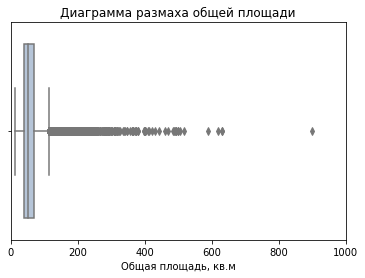

In [64]:
#построим диаграмму размаха общей площади квартир
sns.boxplot(data['total_area_m2'], color='lightsteelblue')
plt.title('Диаграмма размаха общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 1000)
plt.show()

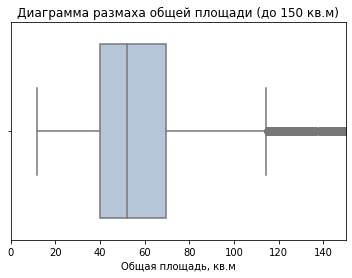

In [65]:
#построим диаграмму размаха общей площади, ограничив площадь 150 кв.м
sns.boxplot(data['total_area_m2'], color='lightsteelblue')
plt.title('Диаграмма размаха общей площади (до 150 кв.м)')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

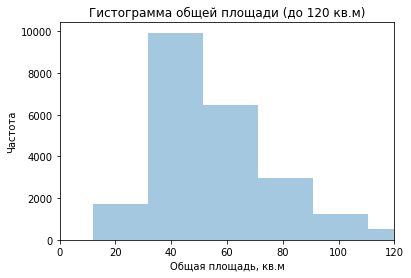

In [66]:
#построим диаграмму для объектов с площадью менее 120 кв.м.
sns.distplot(data['total_area_m2'], kde=False, bins=45)
plt.xlim(0, 120)
plt.title('Гистограмма общей площади (до 120 кв.м)')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

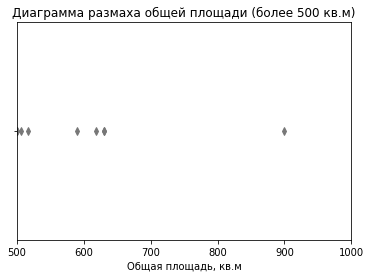

In [67]:
#построим диаграмму размаха, для квартир выходящих за рамки сегмента "среднестатистических", т.е. для квартир с общей площадью более 500 кв.м
sns.boxplot(data['total_area_m2'], color='lightsteelblue')
plt.title('Диаграмма размаха общей площади (более 500 кв.м)')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(500, 1000)
plt.show()

Такие лоты - это редкий случай, но они есть :)

Text(0.5, 1.0, 'Диаграмма размаха общей площади "среднестатистических квартир "без выбросов')

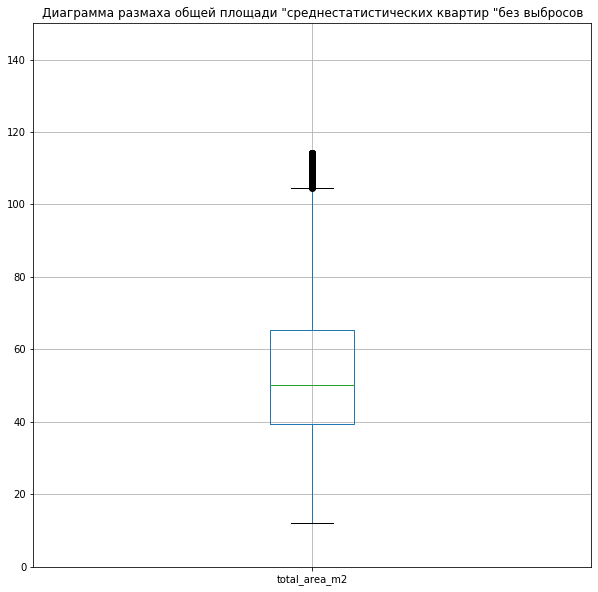

In [68]:
#диаграмма размаха общей площади "среднестатистических квартир "без выбросов
del_outliers(data,'total_area_m2', 1,10,10).set_ylim(0,150)
plt.title('Диаграмма размаха общей площади "среднестатистических квартир "без выбросов')

In [69]:
#добавим столбец с признаком, описывающим аномально большую для среднестатистического сегмента площадь
data['too_large_area'] = data['total_area_m2'] > whiskers('total_area_m2')[1]

In [70]:
print('Средняя общая площадь квартиры с выбросами в данных:', round(data['total_area_m2'].mean()))
print('Средняя общая площадь квартиры без выбросов в данных:', round(del_outliers(data,'total_area_m2',0)['total_area_m2'].mean()))

Средняя общая площадь квартиры с выбросами в данных: 60
Средняя общая площадь квартиры без выбросов в данных: 54


Средний показатель общей площади "среднестатистической" квартиры около 50 квадратных метров. Однако, есть редкие лоты более 500 квадратов, вплоть до 900 метров квадратных.

In [71]:
#цена
data[['last_price']].describe()

,last_price
count,"23,650.00"
mean,"6,541,126.90"
std,"10,896,399.18"
min,"12,190.00"
25%,"3,400,000.00"
50%,"4,650,000.00"
75%,"6,799,000.00"
max,"763,000,000.00"


In [72]:
#напишем функцию, вычисляющую долю аномальных значений в сегменте "среднестатистических квартир" для цены

def anomal_ratio(column):
    return 'Аномальные значения общей цены для среднестатистических квартир составляют {:.1%}'. format(len(data.loc[data[column] > whiskers(column)[1]]) / len(data)) + ' от всей выборки'

anomal_ratio('last_price')

'Аномальные значения общей цены для среднестатистических квартир составляют 8.7% от всей выборки'

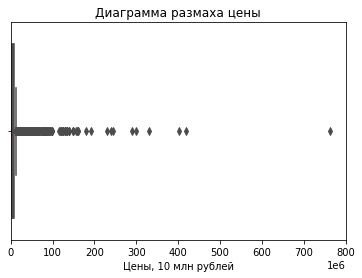

In [73]:
#построим диаграмму зарзмаха цен
sns.boxplot(data['last_price'], color='tab:red')
plt.title('Диаграмма размаха цены')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 800_000_000)
plt.ticklabel_format(axis='x', scilimits=(6, 6))

Максимальная цена квартиры составляет более 700 млн. рублей. Такое вполне возможно в сегменте элитной недвижимости, посмотрим на данные, в которых цена превышает 50 млн. рублей.

In [74]:
#посмотрим на самые дорогие квартиры
data[data['last_price'] > 500000000]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_category,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,too_large_area
12971,Санкт-Петербург,400.00,250.00,nan,2.60,7.00,2,10,10,False,True,False,19,763000000,2017-09-30,33.00,3.96,25.11,1.00,0.53,3.00,0.76,Saturday,September,2017,последний,"1,907,500.00",0.62,nan,True


Это огромная квартира в самом центре, два балкона, прямо рядом с парком. Очень похоже, что это квартира пренадлежит к сегменту элитной недвижимости. 

In [75]:
#посмотрим на самые дорогие квартиры
data[data['last_price'] > 50000000]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_category,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,too_large_area
3,Санкт-Петербург,159.00,nan,nan,2.60,3.00,0,9,14,False,True,False,0,64900000,2015-07-24,424.00,6.80,28.10,2.00,0.08,3.00,0.23,Friday,July,2015,другой,"408,176.10",nan,nan,True
155,Санкт-Петербург,317.00,183.00,nan,3.50,4.00,1,3,3,False,True,False,8,96000000,2017-07-07,62.00,1.77,22.67,2.00,0.51,3.00,0.37,Friday,July,2017,последний,"302,839.12",0.58,nan,True
464,Санкт-Петербург,280.30,159.50,21.10,2.65,6.00,0,7,8,False,True,False,15,66571000,2015-06-11,578.00,6.66,26.32,3.00,0.19,1.00,0.62,Thursday,June,2015,другой,"237,499.11",0.57,0.08,True
492,Санкт-Петербург,216.00,86.00,77.00,3.00,4.00,0,4,5,False,True,False,18,95000000,2017-12-05,14.00,0.44,21.74,2.00,0.14,3.00,0.62,Tuesday,December,2017,другой,"439,814.81",0.40,0.36,True
509,Санкт-Петербург,225.00,134.00,19.50,3.00,6.00,2,2,4,False,True,False,5,90000000,2016-06-26,416.00,5.72,32.86,0.00,nan,2.00,0.52,Sunday,June,2016,другой,"400,000.00",0.60,0.09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,Санкт-Петербург,127.50,85.00,13.00,3.00,4.00,1,8,12,False,True,False,20,59000000,2016-12-21,635.00,6.80,28.10,2.00,0.08,3.00,0.23,Wednesday,December,2016,другой,"462,745.10",0.67,0.10,True
22804,Санкт-Петербург,205.00,108.00,10.00,3.20,4.00,0,3,9,False,True,False,4,81960000,2017-09-29,169.00,2.24,21.95,1.00,0.68,1.00,0.23,Friday,September,2017,другой,"399,804.88",0.53,0.05,True
22831,Санкт-Петербург,187.50,63.70,30.20,3.37,2.00,0,6,6,False,True,False,18,289238400,2019-03-19,nan,1.07,22.49,3.00,0.39,3.00,0.19,Tuesday,March,2019,последний,"1,542,604.80",0.34,0.16,True
22907,Санкт-Петербург,228.00,200.00,nan,2.55,4.00,0,2,5,False,True,False,9,65000000,2016-06-02,nan,1.29,22.78,3.00,0.62,3.00,0.27,Thursday,June,2016,другой,"285,087.72",0.88,nan,True


Эти квартиры так же находятся в центре, рядом есть парки и данные тоже пренадлежат к сегменту элитной недвижимости. 

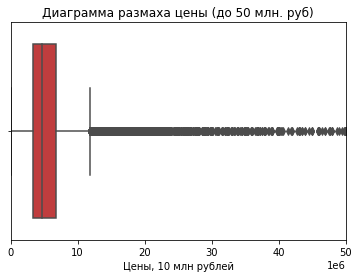

In [76]:
#построим диаграмму зарзмаха до 50 млн. рублей
sns.boxplot(data['last_price'], color='tab:red')
plt.title('Диаграмма размаха цены (до 50 млн. руб)')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 50_000_000)
plt.ticklabel_format(axis='x', scilimits=(6, 6))

Большая часть лотов была продона в диапазоне до 13 млн. рублей. Посмотрим на диаграмму размаха для этого сегмента.

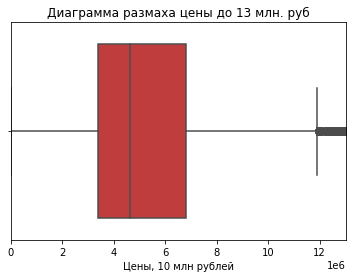

In [77]:
#построим диаграмму зарзмаха до 13 млн. рублей
sns.boxplot(data['last_price'], color='tab:red')
plt.title('Диаграмма размаха цены до 13 млн. руб')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13_000_000)
plt.ticklabel_format(axis='x', scilimits=(6, 6))

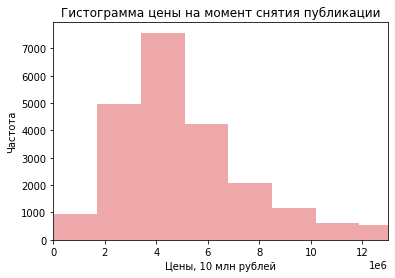

In [78]:
#построим диаграмму цен на момент снятия публикации в диапазоне до 13 млн. рублей
sns.distplot(data['last_price'], kde=False, bins=450, color='tab:red')
plt.xlim(0, 13_000_000)
plt.title('Гистограмма цены на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')
plt.ticklabel_format(axis='x', scilimits=(6, 6))

Text(0.5, 1.0, 'Диаграмма размаха ценs без выбросов')

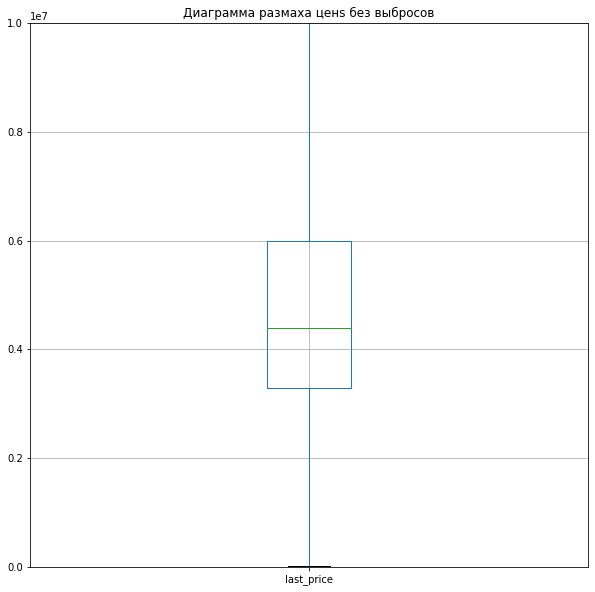

In [79]:
#диаграмма размаха ценs без выбросов
del_outliers(data,'last_price',1,10,10).set_ylim(0, 10000000)
plt.title('Диаграмма размаха ценs без выбросов')

In [80]:
#добавим столбец с признаком, описывающим аномально дорогую недвижимость для сегмента "среднестатистических" квартир
data['expensive_segment'] = data['last_price'] > whiskers('last_price')[1]

In [81]:
print('Средняя цена квартиры с выбросами в данных:', round(data['last_price'].mean()))
print('Средняя цена квартиры без выбросов в данных:', round(del_outliers(data,'last_price',0)['last_price'].mean()))

Средняя цена квартиры с выбросами в данных: 6541127
Средняя цена квартиры без выбросов в данных: 4838942


Средняя стоимость квартиры составляет около 4.8 млн. рублей. Так же присуствуют квартиры с большим метражом и числом комнат, которые принадлежат к лакшери-сегменту, в котором стоимость не имеет пределов. Самые дорогие лоты уходят за сотни миллионов рублей.

In [82]:
#число комнат
data[['number_of_rooms']].describe()

,number_of_rooms
count,"23,650.00"
mean,2.08
std,1.07
min,1.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


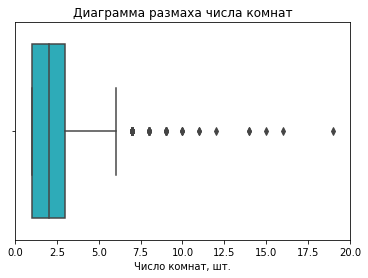

In [83]:
#построим диаграмму размаха числа комнат
sns.boxplot(data['number_of_rooms'], color='tab:cyan')
plt.title('Диаграмма размаха числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 20)

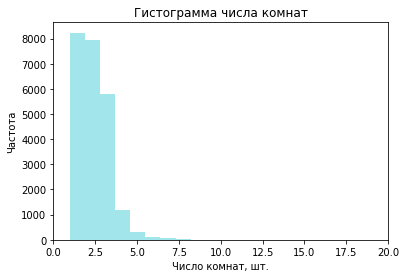

In [84]:
#построим гистограмму размаха числа комнат
sns.distplot(data['number_of_rooms'], kde=False, bins=20, color='tab:cyan')
plt.xlim(0, 20)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

Text(0.5, 1.0, 'Диаграмма размаха числа комнат без выбросов')

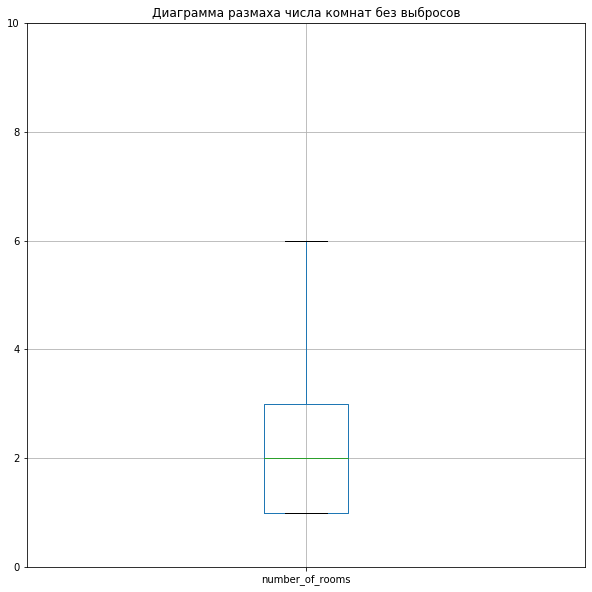

In [85]:
#диаграмма размаха числа комнат без выбросов
del_outliers(data,'number_of_rooms',1,10,10).set_ylim(0,10)
plt.title('Диаграмма размаха числа комнат без выбросов')

In [86]:
#добавим столбец с признаком, описывающим недвижимость с большим числом комнат
data['too_many_rooms'] = data['number_of_rooms'] > whiskers('number_of_rooms')[1]

In [87]:
print('Среднее число комнат с выбросами в данных:', round(data['number_of_rooms'].mean()))
print('Среднее число комнат без выбросов в данных:', round(del_outliers(data,'number_of_rooms',0)['number_of_rooms'].mean()))

Среднее число комнат с выбросами в данных: 2
Среднее число комнат без выбросов в данных: 2


Среднее число комнат составляет 2. Как мы видим, данные по этому признаку не сильно искажены, даже не смотря на присуствие квартир с большим числом комнат.

In [88]:
#высота потолков
data[['ceiling_height_m']].describe()

,ceiling_height_m
count,"23,650.00"
mean,2.71
std,0.23
min,2.20
25%,2.55
50%,2.65
75%,2.75
max,5.00


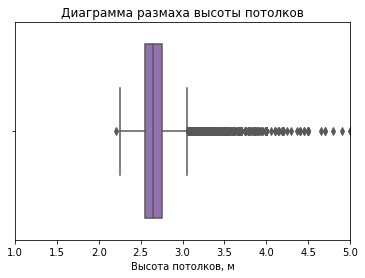

In [89]:
#построим диаграмму размаха высоты потолков
sns.boxplot(data['ceiling_height_m'], color='tab:purple')
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 5)

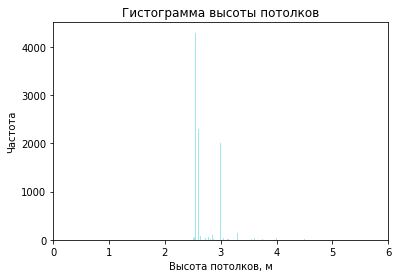

In [90]:
#построим гистограмму размаха высоты потолков
sns.distplot(data['ceiling_height_m'], kde=False, bins=500, color='tab:cyan')
plt.xlim(0, 6)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

Text(0.5, 1.0, 'Диаграмма размаха высоты потолков без выбросов')

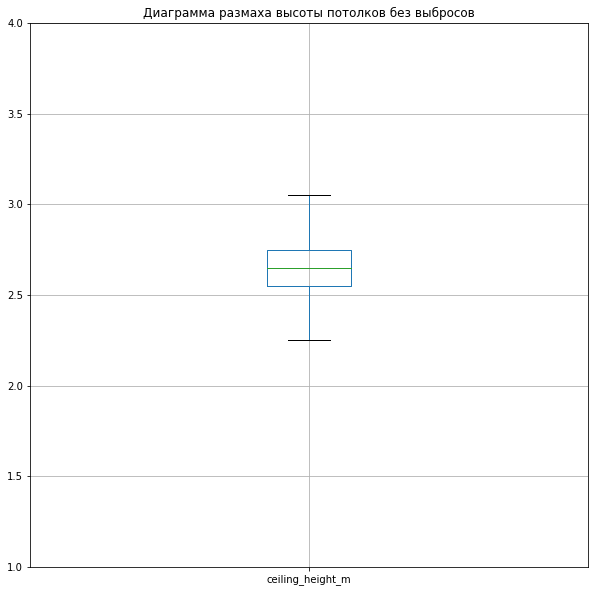

In [91]:
#диаграмма размаха высоты потолков без выбросов
del_outliers(data,'ceiling_height_m',1,10,10).set_ylim(1,4)
plt.title('Диаграмма размаха высоты потолков без выбросов')

In [92]:
#добавим столбец с признаком, описывающим недвижимость с аномальными значениями по высоте потолков
data['unusual_ceiling'] = (data['ceiling_height_m'] > whiskers('ceiling_height_m')[1]) | (data['ceiling_height_m'] < whiskers('ceiling_height_m')[0])

In [93]:
print('Средняя высота потолков с выбросами в данных:', round(data['ceiling_height_m'].mean(), 2))
print('Средняя высота потолков без выбросов в данных:', round(del_outliers(data,'ceiling_height_m',0)['ceiling_height_m'].mean(), 2))

Средняя высота потолков с выбросами в данных: 2.71
Средняя высота потолков без выбросов в данных: 2.66


Средняя высота потолков составляет 2.70 м.

### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

In [94]:
#посмотрим данные по времени продажи квартир
data[['days_exposition']].describe()

,days_exposition
count,"20,470.00"
mean,180.75
std,219.78
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,"1,580.00"


In [95]:
#напишем функцию, вычисляющую долю аномальных значений срока публикации

def anomal_ratio(column):
    return 'Аномальные значения срока размещения публикации составляют {:.1%}'. format(len(data.loc[data[column] > whiskers(column)[1]]) / len(data)) + ' от всей выборки'

anomal_ratio('days_exposition')

'Аномальные значения срока размещения публикации составляют 7.1% от всей выборки'

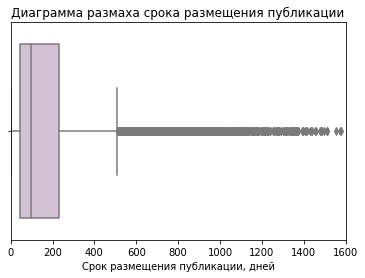

In [96]:
#построим диаграмму размаха срока размещения публикации
sns.boxplot(data['days_exposition'], color='thistle')
plt.title('Диаграмма размаха срока размещения публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.xlim(0, 1600)

Самое выское значение в данных составляет 1580 дней, это 4.3 года. А самое низкое всего 1 день. Эти данные вызывают подозрения, 1 день больше похож на мошенничекие объявления, резко снятое с публикации объявление или ошибку. Самое высокое так же может являться ошибкой или это объявление забыли закрыть сразу и оно продолжало находиться в базе как незавершенное.

Средняя продолжительность размещения публикации - 180 дней. Посмотрим на диаграмму размаха сроком до 450 дней.

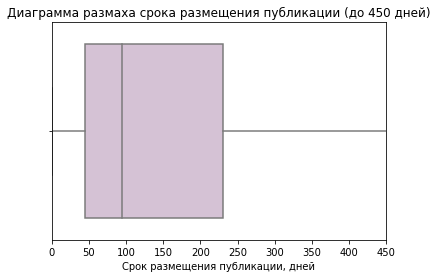

In [97]:
#построим диаграмму размаха срока размещения публикации
sns.boxplot(data['days_exposition'], color='thistle')
plt.title('Диаграмма размаха срока размещения публикации (до 450 дней)')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.xlim(0, 450)

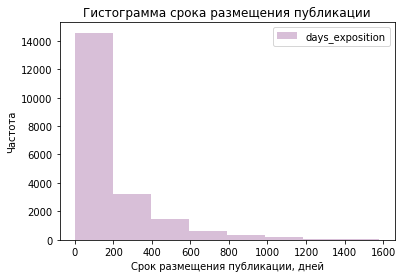

In [98]:
#построим гистограмму срока размещения публикации
data.plot(y='days_exposition', 
          kind='hist', 
          color='thistle', 
          bins=8)
plt.title('Гистограмма срока размещения публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.ylabel('Частота')

Text(0.5, 1.0, 'Диаграмма размаха времени размещения публикации без выбросов')

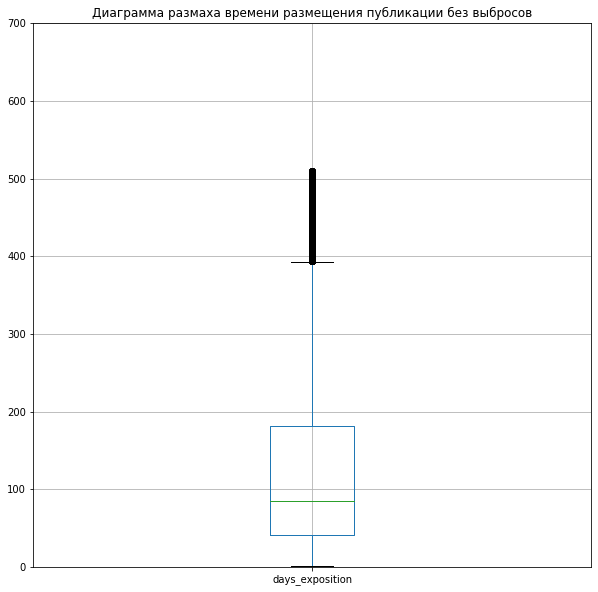

In [99]:
#диаграмма размаха времени размещения публикации без выбросов
del_outliers(data,'days_exposition',1,10,10).set_ylim(0,700)
plt.title('Диаграмма размаха времени размещения публикации без выбросов')

In [100]:
#добавим столбцы с признаком, описывающим недвижимость с аномально низкими и высокими значениями по времени продажи
data['too_slow'] = data['days_exposition'] > whiskers('days_exposition')[1]
data['too_fast'] = data['days_exposition'] < 30

In [101]:
print('Средний период продажи квартиры с выбросами в данных:', round(data['days_exposition'].mean()))
print('Средний период продажи квартиры без выбросов в данных:', round(del_outliers(data,'days_exposition',0)['days_exposition'].mean()))

Средний период продажи квартиры с выбросами в данных: 181
Средний период продажи квартиры без выбросов в данных: 128


In [102]:
print('Медианный период продажи квартиры с выбросами в данных:', round(data['days_exposition'].median()))
print('Медианный период продажи квартиры без выбросов в данных:', round(del_outliers(data,'days_exposition',0)['days_exposition'].median()))

Медианный период продажи квартиры с выбросами в данных: 95
Медианный период продажи квартиры без выбросов в данных: 85


Можно сделать вывод, что нормальный период размещения публикации составляет 90-180 дней. Значения, выше и ниже можно считать необычными - квартира продана слишком быстро или слишком медленно или, возможно, объвления были сняты или их забыли снять. Так же возможен фактор мошенничиских действий и манипуляций с объявлениями. 

### Изучим факторы, которые больше всего влияют на стоимость квартиры. Зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также зависимость от даты размещения: дня недели, месяца и года.

Для изучения "среднестатистического" сегмента уберем выбивающиеся значения

In [103]:
#уберем редкие и выбивающиеся значения
good_data = data[(data['too_large_area'] == False) & 
     (data['expensive_segment'] == False) &
     (data['too_many_rooms'] == False) &
     (data['unusual_ceiling'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

In [104]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16026 entries, 0 to 16025
Data columns (total 35 columns):
city_name                      16026 non-null object
total_area_m2                  16026 non-null float64
living_area_m2                 14639 non-null float64
kitchen_area_m2                14468 non-null float64
ceiling_height_m               16026 non-null float64
number_of_rooms                16026 non-null float64
number_of_balconies            16026 non-null int64
floor                          16026 non-null int64
total_floors_in_house          16026 non-null int64
is_open_plan                   16026 non-null bool
is_apartment                   16026 non-null bool
is_studio                      16026 non-null bool
total_images                   16026 non-null int64
last_price                     16026 non-null int64
first_day_exposition           16026 non-null datetime64[ns]
days_exposition                13579 non-null float64
city_center_distance_km        11612 non

In [105]:
#рассчитаем корреляцию по всем данным
corr = data[['price_per_meter',\
           'total_area_m2',\
           'days_exposition',\
           'city_center_distance_km',\
           'number_of_rooms']].corr()
corr.style.background_gradient()

,price_per_meter,total_area_m2,days_exposition,city_center_distance_km,number_of_rooms
price_per_meter,1,0.302202,0.0477104,-0.318099,0.0575157
total_area_m2,0.302202,1,0.149571,-0.231904,0.760643
days_exposition,0.0477104,0.149571,1,-0.0594809,0.125285
city_center_distance_km,-0.318099,-0.231904,-0.0594809,1,-0.186452
number_of_rooms,0.0575157,0.760643,0.125285,-0.186452,1


In [106]:
#рассчитаем корреляцию для "среднестатистического" сегмента
corr = good_data[['price_per_meter',\
           'total_area_m2',\
           'days_exposition',\
           'city_center_distance_km',\
           'number_of_rooms']].corr()
corr.style.background_gradient()

,price_per_meter,total_area_m2,days_exposition,city_center_distance_km,number_of_rooms
price_per_meter,1,-0.0732684,-0.01994,-0.401722,-0.234397
total_area_m2,-0.0732684,1,0.0720554,-0.0827468,0.800022
days_exposition,-0.01994,0.0720554,1,0.00669091,0.0584812
city_center_distance_km,-0.401722,-0.0827468,0.00669091,1,-0.0472248
number_of_rooms,-0.234397,0.800022,0.0584812,-0.0472248,1


Глядя на данные очевидно, что самое большое влияние на цену квартиры имеют общая площадь и число комнат. Взглянем на факторы по отдельности.

Text(0.5, 1, 'Диаграмма размаха числа комнат по итоговой стоимости')

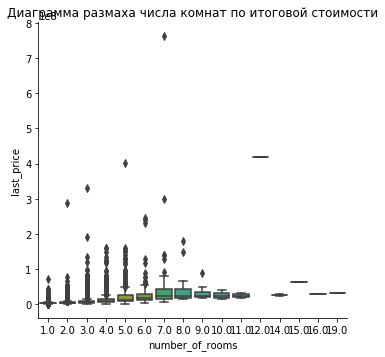

In [107]:
#число комнат
sns.catplot(x='number_of_rooms', y="last_price", kind="box", data=data, palette='husl')
plt.title('Диаграмма размаха числа комнат по итоговой стоимости')

Text(0.5, 1, 'Диаграмма размаха числа комнат по итоговой стоимости "среднестатистических" квартир')

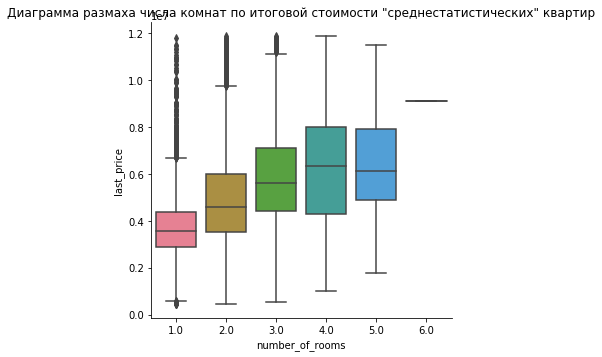

In [108]:
#число комнат для "среднестатистического" сегмента
sns.catplot(x='number_of_rooms', y="last_price", kind="box", data=good_data, palette='husl')
plt.title('Диаграмма размаха числа комнат по итоговой стоимости "среднестатистических" квартир')

Очевидно, что число комнат прямо пропорционально росту цены на квартиру и имеет большое влияние на ценообразование.

Text(0.5, 1, 'Диаграмма размаха категорий этажности по итоговой стоимости')

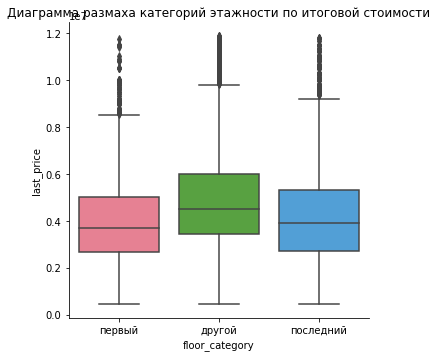

In [109]:
#категория этажа
sns.catplot(x='floor_category', y="last_price", kind="box", data=good_data, palette='husl')
plt.title('Диаграмма размаха категорий этажности по итоговой стоимости')

То что первый этаж считается непопулярным - известный факт. Последние же этажи более престижны, так как нет соседей сверху и хороший вид из она, однако, в данной выборке люди предпочитают квартиры на других этажах, что соотвественно влияет на цену. Возможно, это зависит от типа здания. В старых зданиях есть проблемы с протеканием крыши, в то время как в новостройках квартиры на последних этажах часто делают пентхаусами.

Text(0.5, 1, 'Диаграмма размаха дня размещения публикации по итоговой стоимости')

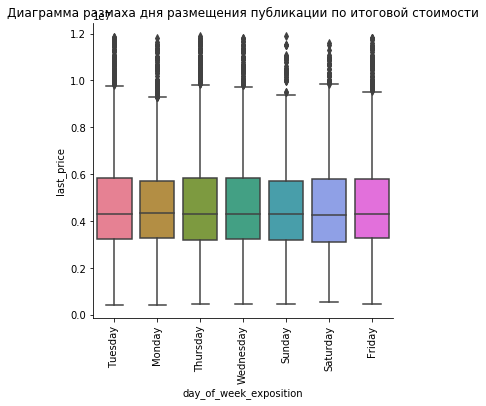

In [110]:
#день недели публикации
sns.catplot(x='day_of_week_exposition', y="last_price", kind="box", data=good_data, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха дня размещения публикации по итоговой стоимости')

Можно сделать вывод, что день недели публикации никак не влияет на цену квартиры.

Text(0.5, 1, 'Диаграмма размаха месяца публикации по итоговой стоимости')

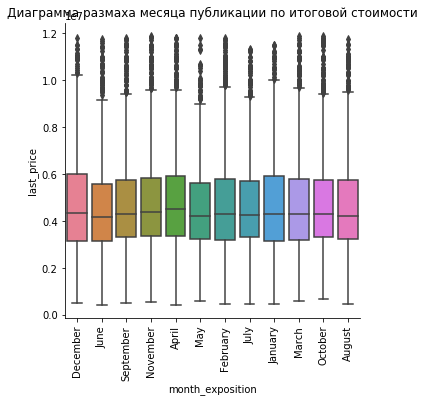

In [111]:
#месяц публикации
sns.catplot(x='month_exposition', y="last_price", kind="box", data=good_data, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха месяца публикации по итоговой стоимости')

С месяцем аналогично как и с днем публикации.

Text(0.5, 1, 'Диаграмма размаха года публикации по итоговой стоимости')

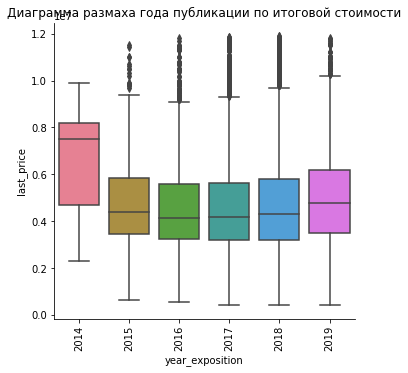

In [112]:
#год публикации
sns.catplot(x='year_exposition', y="last_price", kind="box", data=good_data, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха года публикации по итоговой стоимости')

Год публикации скорее говорит нам об общем состоянии экономики в стране на момент публикации, так как это влияет на покупательскую способность. Данные соотвествуют историческим :)

In [113]:
data.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,year_exposition,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
count,"23,650.00","21,752.00","21,530.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","20,470.00","18,139.00","18,116.00","18,140.00","8,064.00","18,140.00","9,085.00","23,650.00","23,650.00","21,752.00","21,530.00"
mean,60.33,34.45,10.49,2.71,2.08,0.59,5.89,10.67,9.86,"6,541,126.90",180.75,14.20,28.80,0.61,0.49,0.77,0.52,"2,017.37","99,432.25",0.56,0.19
std,35.66,22.03,5.95,0.23,1.07,0.96,4.88,6.59,5.68,"10,896,399.18",219.78,8.61,12.64,0.80,0.34,0.94,0.28,1.04,"50,337.94",0.11,0.07
min,12.00,8.00,0.00,2.20,1.00,0.00,1.00,1.00,0.00,"12,190.00",1.00,0.18,0.00,0.00,0.00,0.00,0.01,"2,014.00",111.83,0.13,0.00
25%,40.00,18.60,7.00,2.55,1.00,0.00,2.00,5.00,6.00,"3,400,000.00",45.00,9.24,18.58,0.00,0.29,0.00,0.29,"2,017.00","76,614.96",0.50,0.13
50%,52.00,30.00,9.00,2.65,2.00,0.00,4.00,9.00,9.00,"4,650,000.00",95.00,13.11,26.76,0.00,0.45,1.00,0.50,"2,017.00","95,000.00",0.57,0.17
75%,69.70,42.30,12.00,2.75,3.00,1.00,8.00,16.00,14.00,"6,799,000.00",231.00,16.29,37.29,1.00,0.61,1.00,0.73,"2,018.00","114,274.16",0.64,0.23
max,900.00,409.70,112.00,5.00,19.00,5.00,33.00,60.00,50.00,"763,000,000.00","1,580.00",65.97,84.87,3.00,3.19,3.00,1.34,"2,019.00","1,907,500.00",1.00,0.79


### Выделим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах, выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [114]:
#посмотрим 10 городов с самой высокой стоимостью лотов
data.groupby('city_name').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter', ascending=False).head(10)

,price_per_meter
city_name,
Зеленогорск,"115,122.80"
Санкт-Петербург,"114,849.01"
поселок Репино,"104,238.61"
Пушкин,"103,125.82"
Сестрорецк,"101,757.62"
поселок Лисий Нос,"100,660.82"
Кудрово,"100,253.04"
деревня Мистолово,"98,549.98"
поселок Левашово,"96,997.69"


Все населенные пункты за пределами Санкт-Петербурга будем считать пригородом.

In [115]:
#напишум функцию, разделяющие города на категорию Спб и пригород
def city_status(row):
    if row['city_name'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'Пригород'
    
#добавим новый столбец
data['city_status'] = data.apply(city_status, axis=1)

In [116]:
#напишум функцию, разделяющие города на категорию Спб и пригород для "среднестатистического" сегмента
def city_status(row):
    if row['city_name'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'Пригород'
    
#добавим новый столбец
good_data['city_status'] = good_data.apply(city_status, axis=1)

In [117]:
#посмотрим средние значения по цене
data.groupby('city_status').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter')

,price_per_meter
city_status,
Пригород,"68,865.10"
Санкт-Петербург,"114,849.01"


In [118]:
#посмотрим медианные значения по цене
data.groupby('city_status').agg({'price_per_meter':'median'}).sort_values(by='price_per_meter')

,price_per_meter
city_status,
Пригород,"68,728.52"
Санкт-Петербург,"104,761.90"


Средние и медианные значения почти одинаковы.

Text(0.5, 1, 'Диаграмма размаха стоимости квадратного метра в Санкт-Петербурге и за его пределами')

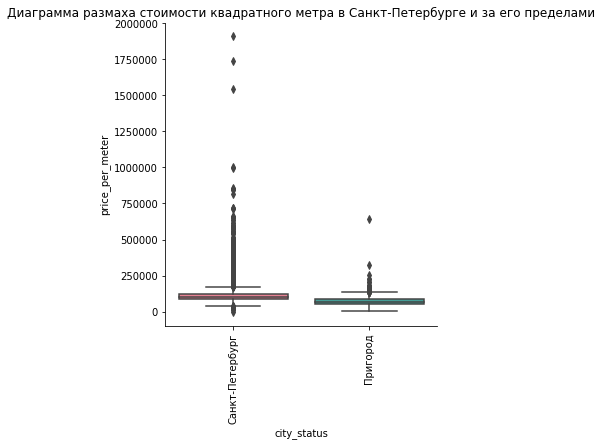

In [119]:
#посмотрим стоимость квадратного метра в Санкт-Петербурге и за его пределами
sns.catplot(x='city_status', y="price_per_meter", kind="box", data=data, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха стоимости квадратного метра в Санкт-Петербурге и за его пределами')

Text(0.5, 1, 'Диаграмма размаха стоимости квадратного метра в Санкт-Петербурге и за его пределами для "среднестатистического" сегмента')

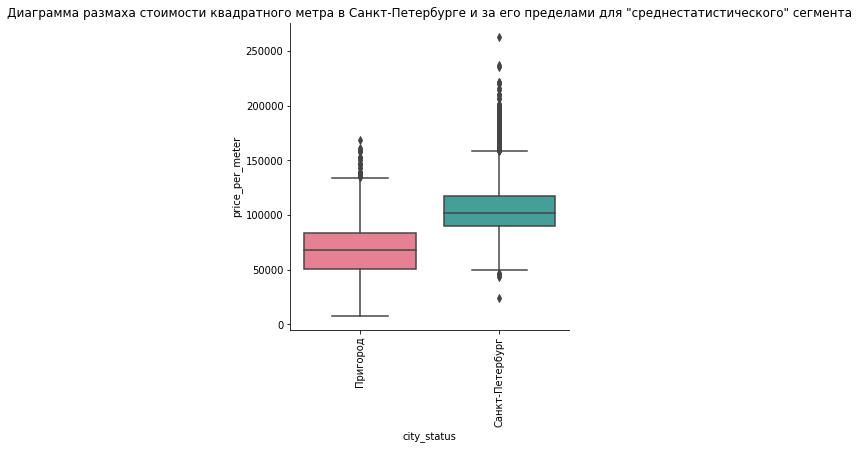

In [120]:
#посмотрим стоимость квадратного метра в Санкт-Петербурге и за его пределами для "среднестатистического" сегмента
sns.catplot(x='city_status', y="price_per_meter", kind="box", data=good_data, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха стоимости квадратного метра в Санкт-Петербурге и за его пределами для "среднестатистического" сегмента')

Данные показывают, что в Санкт-Петербурге цена за кв. метр быше, чем в пригороде, чего и следовало ожидать.

In [121]:
#найдем 10-ку населенных пунктов с самыми дорогостоящими квартирами (за кв. метр)
top_10_data = data.groupby('city_name')\
    .agg({'city_status':'count','price_per_meter':'mean'})
top_10_data = top_10_data.sort_values('city_status', ascending=False).head(10)

In [122]:
top_10_data.sort_values('price_per_meter', ascending=False).head(10)

,city_status,price_per_meter
city_name,,
Санкт-Петербург,15721,"114,849.01"
Пушкин,369,"103,125.82"
деревня Кудрово,299,"92,473.55"
поселок Парголово,327,"90,175.91"
поселок Мурино,556,"85,681.76"
поселок Шушары,440,"78,677.36"
Колпино,338,"75,424.58"
Гатчина,307,"68,746.15"
Всеволожск,398,"68,654.47"


In [123]:
#создадим список первой десятки
top_10_list = top_10_data.reset_index().city_name.to_list()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Диаграмма размаха для самой дорогой цены за квадратный метр в 10 населенных пунктах')

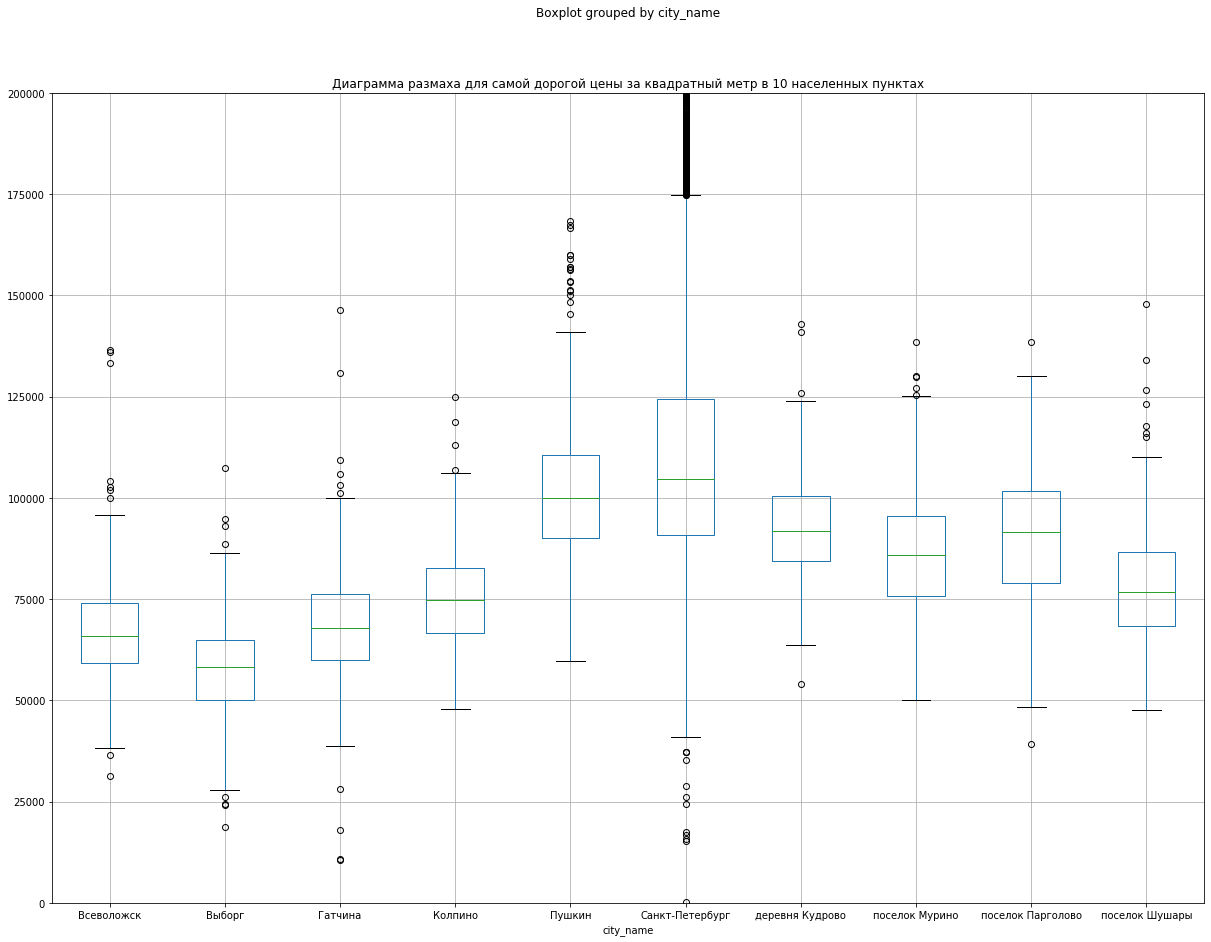

In [124]:
#построим диаграмму размаха для самой дорогой цены за квадратный метр в 10 населенных пунктах
plot = data[data.city_name.isin(top_10_list)]\
    .boxplot('price_per_meter', by='city_name',figsize=(20,15))\
    .set_ylim(0,200000)
plt.title('Диаграмма размаха для самой дорогой цены за квадратный метр в 10 населенных пунктах')

### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Определим по значению цены расстояние определяющее центр города Санкт-Петербург

In [125]:
#выделим данные из таблицы по Санкт-Петербургу в отдельный датафрейм
data_spb = data[data['city_status'] == 'Санкт-Петербург']

Text(0.5, 1.0, 'Диаграмма размаха стоимости в зависимости от удаленности от центра Санкт-Петербурга')

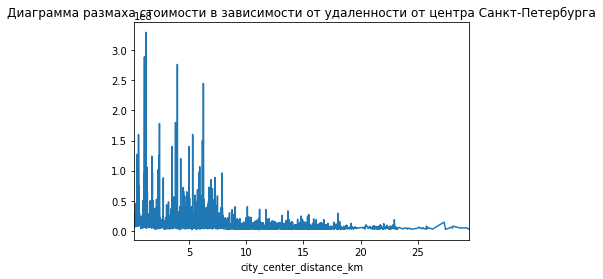

In [126]:
#определим расстояние построив диаграмму
data_spb.groupby('city_center_distance_km')['last_price'].mean().plot()
plt.title('Диаграмма размаха стоимости в зависимости от удаленности от центра Санкт-Петербурга')

По резкому скачку на диаграмме можно определит расстояние определяющее центр города - 8 км.

In [127]:
data_spb.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_category,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,too_large_area,expensive_segment,too_many_rooms,unusual_ceiling,too_slow,too_fast,city_status
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3.00,0,8,16,False,True,False,20,13000000,2019-03-07,nan,16.03,18.86,1.00,0.48,2.00,0.76,Thursday,March,2019,другой,"120,370.37",0.47,0.23,False,True,False,False,False,False,Санкт-Петербург
2,Санкт-Петербург,56.00,34.30,8.30,2.55,2.00,0,4,5,False,True,False,10,5196000,2015-08-20,558.00,13.93,21.74,1.00,0.09,2.00,0.57,Thursday,August,2015,другой,"92,785.71",0.61,0.15,False,False,False,False,True,False,Санкт-Петербург
3,Санкт-Петербург,159.00,nan,nan,2.60,3.00,0,9,14,False,True,False,0,64900000,2015-07-24,424.00,6.80,28.10,2.00,0.08,3.00,0.23,Friday,July,2015,другой,"408,176.10",nan,nan,True,True,False,False,False,False,Санкт-Петербург
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2.00,0,13,14,False,True,False,2,10000000,2018-06-19,121.00,8.10,31.86,2.00,0.11,1.00,0.05,Tuesday,June,2018,другой,"100,000.00",0.32,0.41,False,False,False,False,False,False,Санкт-Петербург
7,Санкт-Петербург,71.60,nan,18.90,2.75,2.00,2,22,24,False,True,False,5,7915000,2019-04-18,nan,11.63,23.98,0.00,nan,0.00,nan,Thursday,April,2019,другой,"110,544.69",nan,0.26,False,False,False,False,False,False,Санкт-Петербург


In [128]:
#удалим пропущенные значения
city_center_data = data_spb.dropna(subset=['city_center_distance_km'])

In [129]:
#посмотрим, сколько таких объявлений, находящихся в центре
len(city_center_data.query('city_center_distance_km <= 8'))

3712

In [130]:
is_city_center = city_center_data.query('city_center_distance_km < 8')

In [131]:
#посмотрим корреляцию
cor_is_center = is_city_center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_is_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1
1,price_per_meter,0.779992
2,total_area_m2,0.636407
3,living_area_m2,0.539719
4,kitchen_area_m2,0.508214
5,too_large_area,0.423567
6,expensive_segment,0.411707
7,number_of_rooms,0.334306
8,too_many_rooms,0.232985
9,total_images,0.131486


Text(0.5, 1, 'Диаграмма размаха числа комнат по итоговой стоимости в центре Санкт-Петербурга')

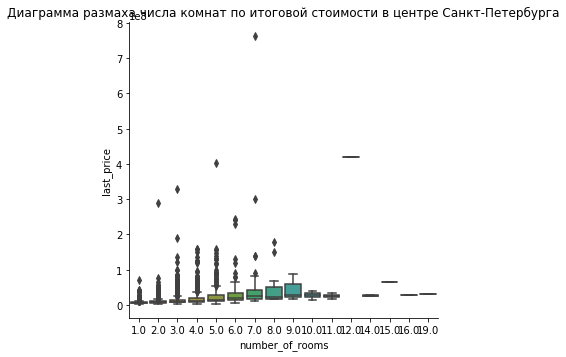

In [132]:
#число комнат (центр Санкт-Петербурга)
sns.catplot(x='number_of_rooms', y="last_price", kind="box", data=is_city_center, palette='husl')
plt.title('Диаграмма размаха числа комнат по итоговой стоимости в центре Санкт-Петербурга')

В данных присутствуют значения с большим числом комнат, это как раз те самые бывшие расселенные коммуналки.

Text(0.5, 1, 'Диаграмма размаха категорий этажности в центре Санкт-Петербурга по итоговой цене')

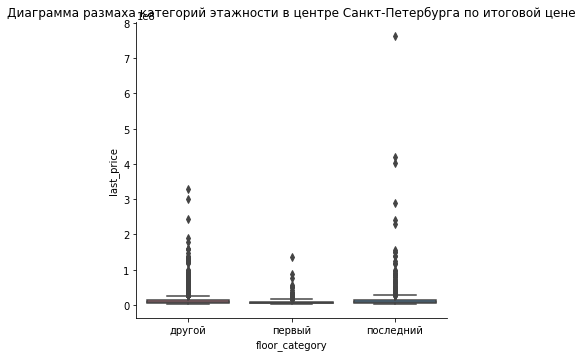

In [133]:
#категория этажа для центра Санкт-Петербурга
sns.catplot(x='floor_category', y="last_price", kind="box", data=is_city_center, palette='husl')
plt.title('Диаграмма размаха категорий этажности в центре Санкт-Петербурга по итоговой цене')

Лоты на первых этажах в центре не очень популярны, что вполне объяснимо тем, что в центре много зданий старого фонда, а в них на первых этажах не очень комфортные условия. Так же аервые этажи часто выкупаются или арендуются как нежилые под магазины и салоны.

Text(0.5, 1, 'Диаграмма размаха года публикации по итоговой стоимости для центра Санкт-Петербурга')

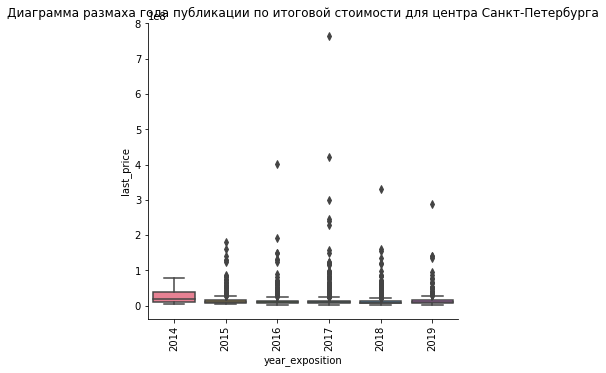

In [134]:
#Диаграмма размаха года публикации по итоговой стоимости для центра Санкт-Петербурга
sns.catplot(x='year_exposition', y="last_price", kind="box", data=is_city_center, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха года публикации по итоговой стоимости для центра Санкт-Петербурга')

In [135]:
data_spb.sample(10)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_category,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,too_large_area,expensive_segment,too_many_rooms,unusual_ceiling,too_slow,too_fast,city_status
10433,Санкт-Петербург,65.90,39.40,6.90,2.50,3.00,1,9,10,False,True,False,16,7600000,2019-04-11,nan,11.32,19.79,0.00,nan,0.00,nan,Thursday,April,2019,другой,"115,326.25",0.60,0.10,False,False,False,False,False,False,Санкт-Петербург
22522,Санкт-Петербург,43.60,16.60,15.80,2.70,1.00,0,2,18,False,True,False,20,4990000,2018-11-01,42.00,8.39,32.31,0.00,nan,0.00,nan,Thursday,November,2018,другой,"114,449.54",0.38,0.36,False,False,False,False,False,False,Санкт-Петербург
3478,Санкт-Петербург,38.20,nan,nan,2.55,1.00,0,1,5,False,True,False,15,5690000,2018-02-26,59.00,5.95,27.25,1.00,0.70,2.00,0.58,Monday,February,2018,первый,"148,952.88",nan,nan,False,False,False,False,False,False,Санкт-Петербург
4509,Санкт-Петербург,42.00,28.00,6.00,2.55,2.00,1,2,5,False,False,False,0,3890000,2016-02-09,152.00,10.87,11.24,0.00,nan,0.00,nan,Tuesday,February,2016,другой,"92,619.05",0.67,0.14,False,False,False,False,False,False,Санкт-Петербург
13782,Санкт-Петербург,51.00,31.60,6.00,2.50,2.00,1,5,9,False,True,False,15,4650000,2018-10-10,97.00,14.93,42.43,0.00,nan,0.00,nan,Wednesday,October,2018,другой,"91,176.47",0.62,0.12,False,False,False,False,False,False,Санкт-Петербург
1471,Санкт-Петербург,69.28,29.52,22.31,2.75,2.00,1,19,25,False,True,False,6,7560000,2017-08-27,198.00,16.29,35.13,0.00,nan,1.00,0.47,Sunday,August,2017,другой,"109,122.40",0.43,0.32,False,False,False,False,False,False,Санкт-Петербург
14303,Санкт-Петербург,55.40,32.00,6.00,2.51,3.00,0,3,5,False,True,False,13,6200000,2017-08-08,216.00,10.91,11.28,1.00,0.62,0.00,nan,Tuesday,August,2017,другой,"111,913.36",0.58,0.11,False,False,False,False,False,False,Санкт-Петербург
23235,Санкт-Петербург,43.85,13.70,11.20,2.55,1.00,0,5,5,False,True,False,7,4700000,2017-10-05,5.00,16.65,36.35,0.00,nan,0.00,nan,Thursday,October,2017,последний,"107,183.58",0.31,0.26,False,False,False,False,False,True,Санкт-Петербург
9134,Санкт-Петербург,30.00,16.00,7.00,2.50,1.00,0,8,9,False,True,False,6,3099000,2017-11-02,69.00,12.04,27.55,2.00,0.19,1.00,0.74,Thursday,November,2017,другой,"103,300.00",0.53,0.23,False,False,False,False,False,False,Санкт-Петербург
10985,Санкт-Петербург,40.00,18.00,12.00,2.60,1.00,0,4,9,False,True,False,13,3850000,2018-10-09,28.00,13.85,32.75,0.00,nan,1.00,0.65,Tuesday,October,2018,другой,"96,250.00",0.45,0.30,False,False,False,False,False,True,Санкт-Петербург


In [136]:
#не центр
not_city_center = city_center_data.query('city_center_distance_km > 8')

In [137]:
#посмотрим корреляцию по квартирам не в центре
cor_not_center = not_city_center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_not_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1
1,total_area_m2,0.834662
2,expensive_segment,0.754728
3,living_area_m2,0.711969
4,kitchen_area_m2,0.639737
5,too_large_area,0.607043
6,price_per_meter,0.532803
7,number_of_rooms,0.523615
8,ceiling_height_m,0.384951
9,unusual_ceiling,0.213208


Text(0.5, 1, 'Диаграмма размаха числа комнат по итоговой стоимости не в центре Санкт-Петербурга')

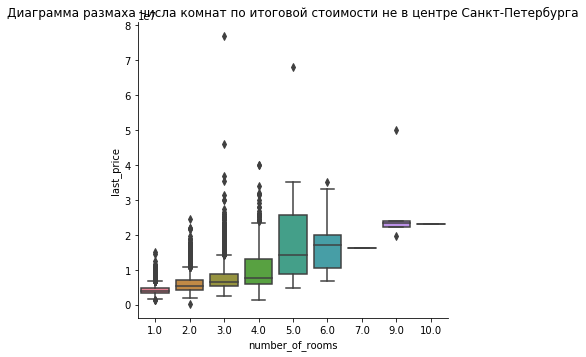

In [138]:
#число комнат (не центр Санкт-Петербурга)
sns.catplot(x='number_of_rooms', y="last_price", kind="box", data=not_city_center, palette='husl')
plt.title('Диаграмма размаха числа комнат по итоговой стоимости не в центре Санкт-Петербурга')

За пределами центра Санкт-Петербурга мы уже не наблюдаем числа комнат более 10. Вероятно, что за пределами центра значительно меньше числа бывших и нынешних коммунальных квартир с большим числом комнат.

Text(0.5, 1, 'Диаграмма размаха категорий этажности не в центре Санкт-Петербурга по итоговой цене')

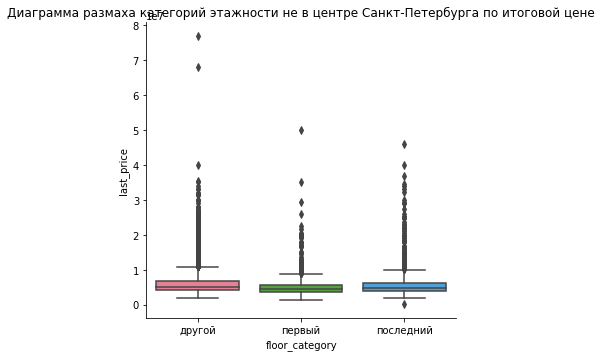

In [139]:
#категория этажа вне центра Санкт-Петербурга
sns.catplot(x='floor_category', y="last_price", kind="box", data=not_city_center, palette='husl')
plt.title('Диаграмма размаха категорий этажности не в центре Санкт-Петербурга по итоговой цене')

За пределами центра Санкт-Петербурга предпочтения по этажу, на котором находится квартира примерно равнозначные, с небольшим перевесом в сторону не первого и не последнего этажа.

Text(0.5, 1, 'Диаграмма размаха года публикации по итоговой стоимости для не центра Санкт-Петербурга')

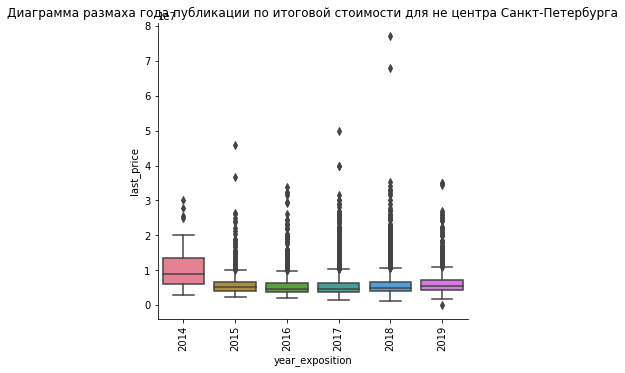

In [140]:
#Диаграмма размаха года публикации по итоговой стоимости для не центра Санкт-Петербурга
sns.catplot(x='year_exposition', y="last_price", kind="box", data=not_city_center, palette='husl')
plt.xticks(rotation=90)
plt.title('Диаграмма размаха года публикации по итоговой стоимости для не центра Санкт-Петербурга')

Тут картина примерно такая же, как и с квартирами в центре Санкт-Петербурга.

In [142]:
#склеим таблицы
cor_in_not_center = cor_is_center.merge(cor_not_center, on='index')
cor_in_not_center = cor_in_not_center.rename(columns={'last_price_x':'cor_in_center', 'last_price_y':'cor_out_center'})
cor_in_not_center.style.background_gradient('coolwarm')

,index,cor_in_center,cor_out_center
0,last_price,1,1
1,price_per_meter,0.779992,0.532803
2,total_area_m2,0.636407,0.834662
3,living_area_m2,0.539719,0.711969
4,kitchen_area_m2,0.508214,0.639737
5,too_large_area,0.423567,0.607043
6,expensive_segment,0.411707,0.754728
7,number_of_rooms,0.334306,0.523615
8,too_many_rooms,0.232985,0.13306
9,total_images,0.131486,0.160795


В целом кретерии влияющие на стоимость квартиры схожи. С разницей в том, что для квартир не в центре не так важны: удаленность от прудов и парков, при этом важна этажность и количество балконов. А для квартир не в центре наиболее важны общая и жилая площадь, число комнат.

In [143]:
data_spb.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,year_exposition,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
count,"15,721.00","14,581.00","14,428.00","15,721.00","15,721.00","15,721.00","15,721.00","15,721.00","15,721.00","15,721.00","13,638.00","15,660.00","15,636.00","15,660.00","7,284.00","15,660.00","7,983.00","15,721.00","15,721.00","14,581.00","14,428.00"
mean,64.75,36.97,11.09,2.73,2.18,0.58,6.24,11.39,10.18,"8,062,507.07",182.79,11.60,28.05,0.63,0.50,0.77,0.52,"2,017.35","114,849.01",0.57,0.18
std,40.42,24.69,6.58,0.25,1.14,0.97,4.90,6.37,5.75,"13,013,133.29",224.72,4.84,11.56,0.79,0.35,0.92,0.28,1.06,"52,584.52",0.11,0.07
min,12.00,8.00,0.00,2.30,1.00,0.00,1.00,1.00,0.00,"12,190.00",1.00,0.18,0.00,0.00,0.00,0.00,0.01,"2,014.00",111.83,0.13,0.00
25%,42.00,19.90,7.20,2.55,1.00,0.00,3.00,5.00,6.00,"4,200,000.00",42.00,8.33,18.58,0.00,0.29,0.00,0.29,"2,017.00","90,909.09",0.50,0.13
50%,55.00,31.30,9.80,2.70,2.00,0.00,5.00,9.00,10.00,"5,500,000.00",95.00,12.24,26.76,0.00,0.46,1.00,0.50,"2,017.00","104,761.90",0.57,0.17
75%,74.60,44.00,12.50,2.80,3.00,1.00,8.00,16.00,14.00,"8,160,000.00",231.00,14.94,36.61,1.00,0.62,1.00,0.74,"2,018.00","124,438.90",0.64,0.23
max,900.00,409.70,112.00,4.90,19.00,5.00,33.00,52.00,50.00,"763,000,000.00","1,572.00",29.49,54.78,3.00,3.19,3.00,1.34,"2,019.00","1,907,500.00",1.00,0.79


<a id='4'><a/> 
## 4. Результаты исследования
[Назад к оглавлению](#back)

Среднестатистическая квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира в многоэтажном доме, площадью около 60 кв. м с потолками 2.70 м, проданная за 6 месяцев (180 дней) по цене 6,5 млн рублей.

Главными факторами влияющими на стоимость являются - общая площадь и число комнат(эти факторы напрямую зависят друг от друга). Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах. Для лотов в центре более важны факторы наличия рядом кусочка природы в виде парка или водоема, нежели для квартир за пределами центра. День недели и месяц публикации объявления не являются факторами, влияющими на стоимость, по которой объект недвижимости будет продан. Исследование лишь показало, что в среднем квартиры продавались по более высоким ценам в 2014 году, но это объясняется экономической ситуацией в стране и мире. 

Квартиры в Санк-Петербурге стоят дороже, чем в области/пригороде. Ближайшими по стоимости к Санкт-Петербургу являются населенные пункты: Пушкин, Кудрово, Парголово и Мурино. За пределами Санкт-Петербурга самый дорогой квадратный метр в Пушкине (99 502 руб.), самый дешевый - в Выборге (57 460 руб.).

Квартиры в центре Санкт-Петербурга - самые дорогие. Встречаются лоты элитного сегмента недвижимости стоимостью более 50 млн. рублей, вплоть доходя почти до миллиарда. Чаще всего это бывшие расселенные коммуналки с большим числом комнат, которые в последние годы часто выкупают под мини-отели и хостелы. За пределами санкт-Петербурга подобные лоты наблюдаются значительно реже. Для квартир не в центре города, чаще всего это новостройки, при формировании цены важны: жилая и общая площадь, количество балконов, этаж, высота потолков, что не так характерно для центра города. 